In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from operator import add
from matplotlib.ticker import (MultipleLocator, FixedLocator, FormatStrFormatter, AutoMinorLocator)

In [43]:
%matplotlib notebook
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": 'serif',
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        "axes.linewidth":1,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}
mpl.rcParams.update(nice_fonts)
RHO_CGS2CCTK = 1.6189988336901327e-18

<IPython.core.display.Javascript object>


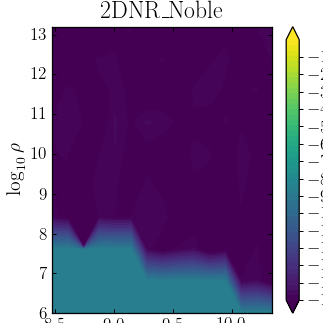

Text(0.5, 11.502909958964642, '$\\log_{10} \\epsilon$')

In [44]:
fig, ax = plt.subplots(1, 1, figsize = (4,4))
plt.tight_layout()
ax.tick_params(which = 'both', direction = 'in', bottom = True, top = True, left = True, right = True, labelleft = True)
#ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#ax.set_ylim( 1, 3)
#ax.set_xlim( 0, 0.022)
#ax.set_yscale('log')
ax.set_title( "2DNR\_Noble")
ax.set_ylabel(r"$\log_{10} \rho$")
ax.set_xlabel(r"$\log_{10} \epsilon$")



In [45]:
test_files = [ '2DNRNoble.h5']
vmin = -15
vmax = 0
for test_file in test_files:
    test = h5py.File( test_file)
    N_RHO = test[ "N_RHO"][0]
    N_TEMP = test[ "N_TEMP"][0]
    prims_or = test[ "prims_or"][()]
    prims_sol = test[ "prims_sol"][()]
    diff = abs( prims_or - prims_sol)
    rel_diff = 2.0 * abs( prims_or - prims_sol) / abs( prims_or + prims_sol)
    rel_diff[ np.where( abs(prims_or-prims_sol)<1E-100)] = 1E-100
    rel_diff = np.log10( np.sum( rel_diff, axis=1))
    rel_diff = np.reshape( rel_diff, (N_RHO,N_TEMP))
    contourf_ = ax.contourf( np.log10( prims_or[:N_TEMP,4]), np.log10( prims_or[::N_TEMP,0]/RHO_CGS2CCTK), rel_diff, levels=np.linspace(vmin,vmax), extend='both')
    test.close()
cbar = fig.colorbar(contourf_,ticks=range(vmin,vmax))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [46]:
fig.savefig( "testResults.pdf", bbox_inches="tight" )

In [6]:
print( np.where( rel_diff == np.max( rel_diff)))

(array([0]), array([0]))


In [147]:
prims_or[0,:]

array([1.61899883e-12, 1.00000000e-01, 0.00000000e+00, 0.00000000e+00,
       3.00000000e+08, 0.00000000e+00, 0.00000000e+00, 2.20385946e-04])

In [148]:
prims_sol[0,:]

array([1.61983553e-12, 9.99659934e-02, 0.00000000e+00, 0.00000000e+00,
       3.00257154e+08, 0.00000000e+00, 0.00000000e+00, 2.20385946e-04])

In [150]:
2*abs( prims_sol[4,:] - prims_or[4,:]) / abs(prims_sol[4,:] + prims_or[4,:])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.00016275, 0.00010709,        nan,        nan, 0.00026985,
              nan,        nan, 0.        ])

In [28]:
prims_or[:N_TEMP,4]

array([3.00000000e+08, 3.09353182e+08, 3.18997971e+08, 3.28943459e+08,
       3.39199019e+08, 3.49774320e+08, 3.60679330e+08, 3.71924329e+08,
       3.83519916e+08, 3.95477022e+08, 4.07806917e+08, 4.20521226e+08,
       4.33631931e+08, 4.47151393e+08, 4.61092355e+08, 4.75467958e+08,
       4.90291753e+08, 5.05577713e+08, 5.21340249e+08, 5.37594217e+08,
       5.54354939e+08, 5.71638215e+08, 5.89460337e+08, 6.07838104e+08,
       6.26788839e+08, 6.46330407e+08, 6.66481228e+08, 6.87260296e+08,
       7.08687199e+08, 7.30782134e+08, 7.53565929e+08, 7.77060061e+08,
       8.01286676e+08, 8.26268611e+08, 8.52029414e+08, 8.78593369e+08,
       9.05985516e+08, 9.34231675e+08, 9.63358473e+08, 9.93393364e+08,
       1.02436466e+09, 1.05630156e+09, 1.08923416e+09, 1.12319352e+09,
       1.15821163e+09, 1.19432151e+09, 1.23155720e+09, 1.26995380e+09,
       1.30954750e+09, 1.35037562e+09, 1.39247665e+09, 1.43589028e+09,
       1.48065742e+09, 1.52682029e+09, 1.57442238e+09, 1.62350858e+09,
      

In [29]:
prims_or[::N_TEMP,0]

array([1.61899883e-12, 1.94646472e-12, 2.34016530e-12, 2.81349751e-12,
       3.38256800e-12, 4.06674120e-12, 4.88929831e-12, 5.87822947e-12,
       7.06718623e-12, 8.49662666e-12, 1.02151920e-11, 1.22813621e-11,
       1.47654449e-11, 1.77519692e-11, 2.13425612e-11, 2.56594023e-11,
       3.08493868e-11, 3.70891206e-11, 4.45909306e-11, 5.36100899e-11,
       6.44535045e-11, 7.74901561e-11, 9.31636587e-11, 1.12007354e-10,
       1.34662458e-10, 1.61899883e-10, 1.94646472e-10, 2.34016530e-10,
       2.81349751e-10, 3.38256800e-10, 4.06674120e-10, 4.88929831e-10,
       5.87822947e-10, 7.06718623e-10, 8.49662666e-10, 1.02151920e-09,
       1.22813621e-09, 1.47654449e-09, 1.77519692e-09, 2.13425612e-09,
       2.56594023e-09, 3.08493868e-09, 3.70891206e-09, 4.45909306e-09,
       5.36100899e-09, 6.44535045e-09, 7.74901561e-09, 9.31636587e-09,
       1.12007354e-08, 1.34662458e-08, 1.61899883e-08, 1.94646472e-08,
       2.34016530e-08, 2.81349751e-08, 3.38256800e-08, 4.06674120e-08,
      

In [87]:
prims_sol[0,:]

array([3.68734239e-12, 6.16120806e-01, 0.00000000e+00, 0.00000000e+00,
       1.92171923e+09, 0.00000000e+00, 0.00000000e+00, 1.00000000e-01])

In [88]:
    rel_diff = 2.0 * abs( prims_or - prims_sol) / abs( prims_or + prims_sol)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [89]:
rel_diff[0,:]

array([0.77957428, 0.37448097,        nan,        nan, 1.45987775,
              nan,        nan, 0.        ])